In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib

In [4]:
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

In [6]:
import statsmodels.api as sm

In [7]:
%matplotlib inline

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
from sklearn.feature_selection import RFE

In [11]:
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [12]:
from sklearn.svm import LinearSVC

In [13]:
from sklearn.feature_selection import SelectFromModel

In [14]:
from sklearn import metrics

In [15]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFE

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
import math

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
from sklearn.metrics import r2_score

In [20]:
from sklearn import preprocessing
from sklearn import utils

In [21]:
from sklearn.metrics import r2_score

In [22]:
from sklearn.feature_selection import RFECV

In [23]:
from sklearn.model_selection import RepeatedKFold

In [24]:
from numpy import mean
from numpy import std
from numpy import amin
from numpy import amax

In [25]:
df = pd.read_csv('../../data/extracted_features_round4_training.csv', header=0)

In [26]:
df = df.drop(columns='Unnamed: 0')

In [27]:
#df = df[['CV', 'TABSSIMPSPACY', 'TAWSSIMSPACY', 'TAKWDIST', 'TABSSIMBERT', 'AKWPWMEAN',
#       'TAWSSIMPSPACY', 'TKWAORATIO', 'TAKWSIMSPACY', 'TMIKWP', 'TABSSIMSPACY',
#       'TAFSSIMSPACY', 'TAMIKWWSSIMSPACY', 'TKWAOWRATIO', 'TAFSSD']]

In [28]:
scaler = StandardScaler()

In [29]:
X = df.drop(columns='CV')

In [30]:
X = pd.DataFrame(scaler.fit_transform(X),columns = X.columns,index = df.index)

In [31]:
float_labels = np.array(df['CV'])

In [32]:
lab_enc = preprocessing.LabelEncoder()
labels = lab_enc.fit_transform(float_labels)

In [33]:
df.columns

Index(['CV', 'TL', 'AL', 'TWC', 'AWC', 'TSC', 'ASC', 'TALRATIO', 'TAWCRATIO',
       'TASCRATIO', 'TP', 'AP', 'TAPD', 'TAPMEAN', 'TS', 'AS', 'TASD',
       'TASMEAN', 'TASCCRATIO', 'TASCCD', 'TKWC', 'AKWC', 'TAKWCRATIO',
       'AMIKWP', 'TMIKWS', 'AMIKWS', 'AFSP', 'TAFSPMEAN', 'TAFSPD', 'AFSS',
       'TAFSSMEAN', 'TAFSSD', 'TMIKWAORATIO', 'TKWAORATIO', 'TKWAOWRATIO',
       'TKWPMEAN', 'AKWPMEAN', 'TAKWPMEAN', 'TAKWPD', 'TKWPWMEAN', 'AKWPWMEAN',
       'TAKWPWMEAN', 'TAKWPWD', 'TAMIKWFP', 'TAMIKWDIST', 'TAKWDIST',
       'TASIMSPACY', 'TABSSIMSPACY', 'TAWSSIMSPACY', 'TAASSIMSPACY',
       'TAFSSIMSPACY', 'TABSSIMPSPACY', 'TAWSSIMPSPACY', 'TAGSSIMRATIOSPACY',
       'TVC', 'AVC', 'TAVCD', 'TNC', 'ANC', 'TANCD', 'TABSSIMBERT',
       'TAWSSIMBERT', 'TAASSIMSBERT', 'TAFSSIMBERT', 'TABSSIMPBERT',
       'TAWSSIMPBERT', 'TAGSSIMRATIOBERT', 'TAMIKWASSIMSPACY',
       'TAMIKWBSSIMSPACY', 'TAMIKWWSSIMSPACY', 'TMIKWP', 'TAMKWSSIMSPACY',
       'TAMKWSP', 'TAMKWSPD', 'TAMKWSS', 'TAMKWSSD', 'TA

In [34]:
feature_list = list(X.columns)

In [35]:
features = np.array(X)

In [36]:
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [158]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (725, 99)
Training Labels Shape: (725,)
Testing Features Shape: (242, 99)
Testing Labels Shape: (242,)


In [37]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=42)

In [39]:
default_random_forest_classifier = RandomForestClassifier()
rfe = RFECV(default_random_forest_classifier,cv=cv,scoring="f1_macro")

rfe.fit(X,labels)

RFECV(cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=42),
      estimator=RandomForestClassifier(), scoring='f1_macro')

In [41]:
selected_features = np.array(feature_list)[rfe.get_support()]

In [42]:
selected_features.shape

(2,)

In [43]:
selected_features

array(['TAVCD', 'TANCRATIOD'], dtype='<U17')

In [38]:
X_selected = X[['TAVCD', 'TANCRATIOD']]

In [39]:
features_selected = np.array(X_selected)

In [39]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier(random_state = 42)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 100, scoring='f1_macro', 
                              cv = cv, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf_random.fit(features_selected, labels);

Fitting 30 folds for each of 100 candidates, totalling 3000 fits


In [ ]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 50,
 'bootstrap': True}

In [97]:

base_model = RandomForestClassifier(random_state = 42)
base_model.fit(X_selected, labels)
base_accuracy = mean(cross_val_score(base_model, features_selected, labels, scoring='f1_macro', cv=cv))
print('F1: {:0.5f}.'.format(base_accuracy))

F1: 0.14633.


In [98]:

best_random = rf_random.best_estimator_
random_accuracy = mean(cross_val_score(best_random, features_selected, labels, scoring='f1_macro', cv=cv))
print('F1: {:0.5f}.'.format(random_accuracy))

F1: 0.15064.


In [99]:

print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Improvement of 2.95%.


In [92]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [40, 50, 60, 70],
    'max_features': ['sqrt', 'auto'],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [1, 2, 3],
    'n_estimators': [100, 200, 300, 400]
}

# Create a base model
rf = RandomForestClassifier(random_state = 42)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, scoring = 'f1_macro',
                          cv = cv, n_jobs = -1, verbose = 2, return_train_score=True)

In [93]:
# Fit the grid search to the data
grid_search.fit(features_selected, labels);

Fitting 30 folds for each of 288 candidates, totalling 8640 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan 0.14619119 0.15062391
 0.14851397 0.14790906 0.14227721 0.1459     0.14577871 0.14631124
        nan        nan        nan        nan 0.1352131  0.13875941
 0.13551211 0.13770628 0.1352131  0.13875941 0.13551211 0.13770628
        nan        nan        nan        nan 0.13459954 0.13313481
 0.13296395 0.13394594 0.13459954 0.13313481 0.13296395 0.13394594
        nan        nan        nan        nan 0.14619119 0.15062391
 0.14851397 0.14790906 0.14227721 0.1459     0.14577871 0.14631124
        nan        nan        nan        nan 0.1352131  0.13875941
 0.13551211 0.13770628 0.1352131  0.13875941 0.13551211 0.13770628
        nan        nan        nan        nan 0.13459954 0.13313481
 0.13296395 0.13394594 0.13459954 0.13313481 0.13296395 0.13394594
        nan        nan        nan        nan 0.146326

In [94]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 50,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [100]:
best_grid = grid_search.best_estimator_
grid_accuracy = mean(cross_val_score(best_grid, features_selected, labels, scoring='f1_macro', cv=cv))
print('Accuracy: {:0.5f}.'.format(grid_accuracy))

Accuracy: 0.15064.


In [101]:
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

Improvement of 2.95%.


In [ ]:
{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 50,
 'bootstrap': True}

In [40]:
rf_final = RandomForestClassifier(n_estimators = 200, min_samples_split = 2, min_samples_leaf = 1, max_features = 'sqrt', max_depth = 50, bootstrap = True)

In [42]:
roc = cross_val_score(rf_final, features_selected, labels, scoring='roc_auc_macro', cv=cv) * 100

ValueError: 'roc_auc_macro' is not a valid scoring value. Use sorted(sklearn.metrics.SCORERS.keys()) to get valid options.

In [63]:
accuracy = cross_val_score(rf_final, features_selected, labels, scoring='accuracy', cv=cv) * 100
accuracy

array([14.43298969, 23.71134021, 30.92783505, 22.68041237, 27.83505155,
       24.74226804, 30.92783505, 27.08333333, 22.91666667, 30.20833333,
       26.80412371, 23.71134021, 25.77319588, 34.02061856, 23.71134021,
       25.77319588, 26.80412371, 26.04166667, 30.20833333, 26.04166667,
       21.64948454, 19.58762887, 25.77319588, 30.92783505, 28.86597938,
       26.80412371, 24.74226804, 27.08333333, 20.83333333, 34.375     ])

In [64]:
print("Mean: %f" % mean(accuracy))
print("SD: %f" % std(accuracy))
print("Max: %f" % amax(accuracy))
print("Min: %f" % amin(accuracy))

Mean: 26.166595
SD: 4.154817
Max: 34.375000
Min: 14.432990


In [65]:
precision = cross_val_score(rf_final, features_selected, labels, scoring='precision_macro', cv=cv)
precision

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedM

array([0.0732493 , 0.10500364, 0.16670043, 0.17645202, 0.15164117,
       0.13663004, 0.14751905, 0.20729644, 0.11973827, 0.22978836,
       0.11606979, 0.1253887 , 0.20520881, 0.19703784, 0.14162874,
       0.17166412, 0.12290428, 0.14814726, 0.15579262, 0.11698638,
       0.10905682, 0.11395731, 0.12467487, 0.19463802, 0.13661859,
       0.12734912, 0.12469878, 0.12630156, 0.13131721, 0.26370851])

In [66]:
print("Mean: %f" % mean(precision))
print("SD: %f" % std(precision))
print("Max: %f" % amax(precision))
print("Min: %f" % amin(precision))

Mean: 0.148906
SD: 0.040747
Max: 0.263709
Min: 0.073249


In [67]:
recall = cross_val_score(rf_final, features_selected, labels, scoring='recall_macro', cv=cv)
recall

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is 

array([0.09640805, 0.10893817, 0.16767354, 0.14161445, 0.18872827,
       0.15646772, 0.15338065, 0.24319473, 0.13879441, 0.20166325,
       0.13303571, 0.14758199, 0.17709373, 0.20866311, 0.14658009,
       0.15455122, 0.11331598, 0.13456543, 0.19105181, 0.13953981,
       0.10711881, 0.12277047, 0.15901506, 0.18310061, 0.16389803,
       0.14375   , 0.12606838, 0.15416667, 0.11694595, 0.21592796])

In [68]:
print("Mean: %f" % mean(recall))
print("SD: %f" % std(recall))
print("Max: %f" % amax(recall))
print("Min: %f" % amin(recall))

Mean: 0.154520
SD: 0.034283
Max: 0.243195
Min: 0.096408


In [69]:
f1 = cross_val_score(rf_final, features_selected, labels, scoring='f1_macro', cv=cv)
f1

array([0.07261835, 0.11211869, 0.16143285, 0.14186302, 0.15538083,
       0.12755102, 0.12862077, 0.21868481, 0.13687714, 0.21292191,
       0.11446216, 0.11943876, 0.18105144, 0.21128057, 0.13956044,
       0.14948418, 0.11812864, 0.11338844, 0.1500033 , 0.1330139 ,
       0.1012219 , 0.10261209, 0.14366348, 0.18019497, 0.14354893,
       0.13613374, 0.13711685, 0.12103233, 0.12555963, 0.21031079])

In [70]:
print("Mean: %f" % mean(f1))
print("SD: %f" % std(f1))
print("Max: %f" % amax(f1))
print("Min: %f" % amin(f1))

Mean: 0.143309
SD: 0.035041
Max: 0.218685
Min: 0.072618


In [71]:
jaccard = cross_val_score(rf_final, features_selected, labels, scoring='jaccard_macro', cv=cv)
jaccard

array([0.04222844, 0.06366582, 0.09704082, 0.10289918, 0.09539805,
       0.08227032, 0.08360697, 0.12622498, 0.06377142, 0.11576354,
       0.06901613, 0.062093  , 0.09051643, 0.12022273, 0.0877551 ,
       0.09911125, 0.06756798, 0.07606283, 0.11798754, 0.07041207,
       0.07305308, 0.06301042, 0.07808827, 0.11440476, 0.09602934,
       0.07923582, 0.0802005 , 0.08899183, 0.080287  , 0.14292019])

In [72]:
print("Mean: %f" % mean(jaccard))
print("SD: %f" % std(jaccard))
print("Max: %f" % amax(jaccard))
print("Min: %f" % amin(jaccard))

Mean: 0.087661
SD: 0.022214
Max: 0.142920
Min: 0.042228


In [73]:
feature_importances = []

In [74]:
feature_list_selected = list(X_selected.columns)

In [75]:
for i in range(len(feature_list_selected)):
    feature_importances.append([])

In [76]:
for train_index , test_index in cv.split(X_selected):
    X_train , X_test = X_selected.iloc[train_index,:],X_selected.iloc[test_index,:]
    y_train , y_test = labels[train_index] , labels[test_index]
     
    rf_final.fit(X_train,y_train)
    pred_values = rf_final.predict(X_test)
    
    importances = list(rf_final.feature_importances_)
     
    for i in range(len(importances)):
        feature_importances[i].append(importances[i])

In [77]:
mean_feature_importances = []
for importances in feature_importances:
    mean_feature_importances.append(mean(importances))

In [78]:
# List of tuples with variable and importance
feature_importances_tuples = [(feature, round(importance, 5)) for feature, importance in zip(feature_list_selected, mean_feature_importances)]
# Sort the feature importances by most important first
feature_importances_tuples = sorted(feature_importances_tuples, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances_tuples];

Variable: TANCRATIOD           Importance: 0.50164
Variable: TAVCD                Importance: 0.49836


In [79]:
f = [feature for feature, importance in feature_importances_tuples]
imp = [importance for feature, importance in feature_importances_tuples]

In [80]:
imp_coef = pd.Series(imp, index = f)
imp_coef = imp_coef.iloc[::-1]

In [81]:
imp_coef

TAVCD         0.49836
TANCRATIOD    0.50164
dtype: float64

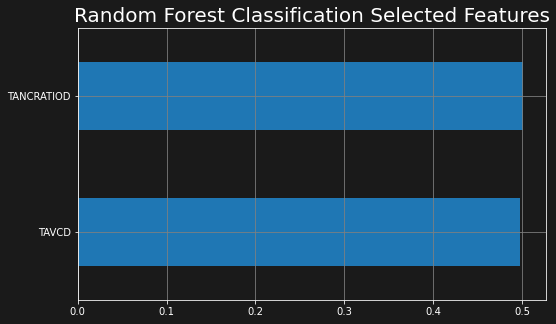

In [82]:
matplotlib.rcParams['figure.figsize'] = (10.0, 5.0)
ax = imp_coef.plot(kind = "barh")
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.patch.set_alpha(0)

ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

ax.spines['left'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')
ax.spines['bottom'].set_color('white')
plt.gcf().subplots_adjust(left=0.25)
fig = ax.get_figure()
ax.set_facecolor((0.1, 0.1, 0.1))
fig.patch.set_facecolor((0.1, 0.1, 0.1))
plt.title(label="Random Forest Classification Selected Features",
          fontsize=20,
          color="white")
plt.grid(c='gray')
fig.savefig('../../images/rf_classification_features.png', transparent=False)

In [83]:
train_features, test_features, train_labels, test_labels = train_test_split(features_selected, labels, test_size = 0.25, random_state = 42)

In [84]:
rf_final.fit(train_features, train_labels)

RandomForestClassifier(max_depth=50, max_features='sqrt', n_estimators=200)

In [85]:
predictions = rf_final.predict(test_features)

In [89]:
test_labels_real = np.array([(label/2)+1 for label in test_labels])
predictions_real = np.array([(prediction/2)+1 for prediction in predictions])

In [90]:
test_labels

array([3, 5, 5, 6, 3, 5, 6, 5, 3, 5, 5, 5, 5, 6, 2, 7, 6, 7, 4, 4, 6, 5,
       6, 6, 6, 7, 5, 3, 6, 6, 6, 4, 5, 6, 5, 6, 5, 6, 5, 5, 5, 6, 5, 6,
       5, 5, 7, 6, 4, 3, 6, 6, 7, 5, 7, 6, 2, 7, 5, 4, 6, 6, 4, 7, 6, 6,
       8, 1, 7, 5, 7, 5, 3, 2, 7, 5, 6, 7, 4, 7, 7, 6, 4, 2, 5, 6, 6, 5,
       4, 6, 5, 5, 4, 5, 4, 4, 5, 6, 3, 6, 6, 6, 6, 6, 5, 5, 7, 5, 5, 4,
       6, 6, 6, 5, 5, 5, 1, 7, 4, 4, 3, 6, 7, 4, 5, 6, 4, 7, 6, 5, 6, 6,
       4, 4, 7, 6, 6, 3, 4, 6, 7, 5, 6, 6, 4, 4, 6, 7, 8, 8, 5, 4, 6, 2,
       6, 5, 3, 5, 5, 3, 6, 4, 5, 5, 6, 4, 5, 6, 4, 5, 7, 3, 6, 6, 6, 8,
       6, 4, 5, 6, 6, 7, 4, 5, 5, 5, 7, 8, 8, 5, 8, 5, 4, 4, 5, 5, 5, 5,
       4, 4, 5, 5, 3, 6, 7, 5, 5, 3, 6, 7, 6, 6, 6, 7, 5, 4, 2, 5, 7, 5,
       6, 5, 5, 5, 7, 7, 4, 5, 5, 5, 6, 4, 7, 4, 6, 5, 7, 6, 8, 5, 5, 6],
      dtype=int64)

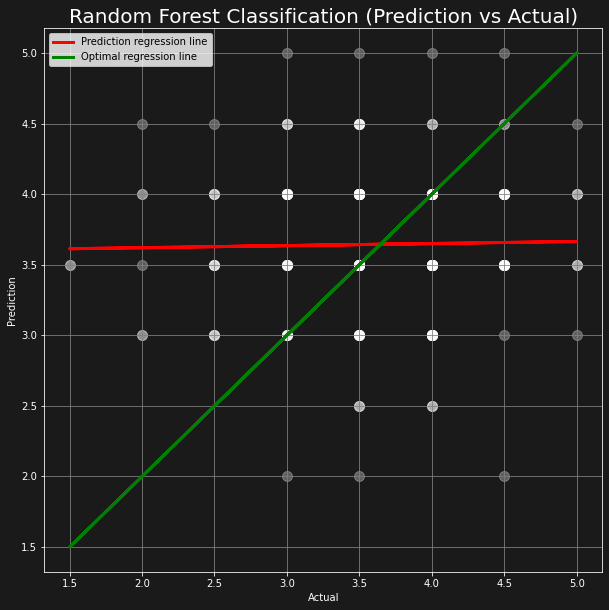

In [91]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.scatter(test_labels_real, predictions_real,  color='white', alpha=0.3, s=100)
m, b = np.polyfit(test_labels_real, predictions_real, 1)
ax.plot(test_labels_real, m*test_labels_real+b, color='red', linewidth=3, label="Prediction regression line")
ax.legend()
ax.plot(test_labels_real, test_labels_real, color='green', linewidth=3, label="Optimal regression line")
ax.legend()
plt.xlabel("Actual")
plt.ylabel("Prediction")

ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')

ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

ax.spines['left'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')
ax.spines['bottom'].set_color('white')

ax.set_facecolor((0.1, 0.1, 0.1))
fig.patch.set_facecolor((0.1, 0.1, 0.1))
plt.title(label="Random Forest Classification (Prediction vs Actual)",
          fontsize=20,
          color="white")
plt.grid(c='gray')
plt.savefig('../../images/random_forest_classification.png', transparent=False)